<a href="https://colab.research.google.com/github/dosb94/Python_AI_Course/blob/main/Proyecto_Mod1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
## Proyecto Integrador: Analisis de Calificaciones de Estudiantes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm

In [12]:
#Crear Dataset con Numpy
np.random.seed(47)
n_alumnos = 50
materias = ['Matematicas', 'Ciencias', 'Ingles', 'Literatura']
num_materias = len(materias)
print("=" * 50)
print("PARTE 1: CREACIÓN DEL DATASET DE ESTUDIANTES")
print("=" * 50)

PARTE 1: CREACIÓN DEL DATASET DE ESTUDIANTES


In [6]:
#Generacion de Calificaciones
calificaciones = np.random.uniform(0, 10.1, size=(n_alumnos, num_materias))
calificaciones = np.round(calificaciones, 1)  # Redondear a 1 decimal

# Crear DataFrame
df_estudiantes = pd.DataFrame(
    calificaciones,
    columns=materias,
    index=[f"EST{i+1:03d}" for i in range(n_alumnos)]
)

df_estudiantes.index.name = 'ID_Estudiante'

# Mostrar información del dataset
print(f"\n1. INFORMACIÓN GENERAL DEL DATASET:")
print(f"   - Total de estudiantes: {n_alumnos}")
print(f"   - Total de materias: {num_materias}")
print(f"   - Rango de calificaciones: 0.0 - 10.0")
print(f"   - Materias: {', '.join(materias)}")

# Mostrar calificaciones de los primeros 5 estudiantes
print(f"\n2. CALIFICACIONES DE LOS PRIMEROS 5 ESTUDIANTES:")
print("-" * 50)
print(df_estudiantes.head().to_string())

# Mostrar estadísticas básicas de las calificaciones
print(f"\n3. ESTADÍSTICAS BÁSICAS POR MATERIA:")
print("-" * 50)
for materia in materias:
    print(f"\n{materia}:")
    print(f"  - Mínimo: {df_estudiantes[materia].min():.1f}")
    print(f"  - Máximo: {df_estudiantes[materia].max():.1f}")
    print(f"  - Promedio: {df_estudiantes[materia].mean():.1f}")
    print(f"  - Desviación estándar: {df_estudiantes[materia].std():.1f}")



1. INFORMACIÓN GENERAL DEL DATASET:
   - Total de estudiantes: 50
   - Total de materias: 4
   - Rango de calificaciones: 0.0 - 10.0
   - Materias: Matematicas, Ciencias, Ingles, Literatura

2. CALIFICACIONES DE LOS PRIMEROS 5 ESTUDIANTES:
--------------------------------------------------
               Matematicas  Ciencias  Ingles  Literatura
ID_Estudiante                                           
EST001                 1.1       9.8     7.4         3.5
EST002                 7.1       8.1     6.5         4.2
EST003                 7.1       2.5     2.6         0.2
EST004                 1.0       3.0     6.5         3.3
EST005                 1.9       9.3     2.7         2.8

3. ESTADÍSTICAS BÁSICAS POR MATERIA:
--------------------------------------------------

Matematicas:
  - Mínimo: 0.0
  - Máximo: 9.9
  - Promedio: 5.1
  - Desviación estándar: 3.0

Ciencias:
  - Mínimo: 0.4
  - Máximo: 9.8
  - Promedio: 5.7
  - Desviación estándar: 2.8

Ingles:
  - Mínimo: 0.1
  - Máximo: 

In [10]:
print("\n" + "=" * 60)
print("PARTE 2: CLASE 'ALUMNO'")
print("=" * 60)

class Alumno:
    """
    Clase que representa a un estudiante con sus calificaciones.

    Atributos:
        id_estudiante (str): ID del estudiante
        materias (list): Lista de nombres de las materias
        calificaciones (dict): Diccionario con calificaciones por materia
        umbral_aprobacion (float): Calificación mínima para aprobar (por defecto 6.0)
    """

    def __init__(self, id_estudiante, calificaciones, materias, umbral_aprobacion=6.0):
        """
        Inicializa un objeto Alumno.

        Parámetros:
            id_estudiante (str): ID del estudiante
            calificaciones (dict/list): Calificaciones del estudiante
            materias (list): Lista de nombres de materias
            umbral_aprobacion (float): Calificación mínima para aprobar
        """
        self.id_estudiante = id_estudiante
        self.materias = materias.copy()  # Copia de la lista original
        self.umbral_aprobacion = umbral_aprobacion

        # Asegurar calificaciones estén en formato dict
        if isinstance(calificaciones, dict):
            self.calificaciones = calificaciones
        elif isinstance(calificaciones, (list, np.ndarray)):
            self.calificaciones = dict(zip(materias, calificaciones))
        else:
            raise ValueError("Las calificaciones deben ser dict, list o numpy array")

    def mostrar_info(self):
        print(f"\nInformación del Estudiante {self.id_estudiante}:")
        print("-" * 40)
        for materia in self.materias:
            print(f"  {materia}: {self.calificaciones[materia]:.1f}")
        print(f"  Promedio: {self.calcular_promedio():.1f}")
        print(f"  Estado: {self.determinar_aprobacion()}")

    def calcular_promedio(self):
        return np.mean(list(self.calificaciones.values()))

    def determinar_aprobacion(self):
        promedio = self.calcular_promedio()
        return "APROBADO" if promedio >= self.umbral_aprobacion else "REPROBADO"

    def obtener_calificaciones(self):
        return [self.calificaciones[materia] for materia in self.materias]

    def obtener_materias_aprobadas(self):
        materias_aprobadas = []
        for materia in self.materias:
            if self.calificaciones[materia] >= self.umbral_aprobacion:
                materias_aprobadas.append(materia)
        return materias_aprobadas

    def generar_reporte(self):
        """Genera un reporte detallado del estudiante."""
        reporte = {
            'id': self.id_estudiante,
            'calificaciones': self.calificaciones,
            'promedio': round(self.calcular_promedio(), 1),
            'estado': self.determinar_aprobacion(),
            'materias_aprobadas': self.obtener_materias_aprobadas(),
            'total_materias_aprobadas': len(self.obtener_materias_aprobadas())
        }
        return reporte

# Demostración de uso de la clase Alumno
print("\nDEMOSTRACIÓN DE LA CLASE ALUMNO")
print("-" * 40)

# Crear algunos objetos Alumno a partir del dataset
alumnos_objetos = []
primeros_5_ids = df_estudiantes.index[:5].tolist()

for idx in primeros_5_ids:
    # Obtener calificaciones del DataFrame
    calif_estudiante = df_estudiantes.loc[idx].values
    # Crear objeto Alumno
    alumno = Alumno(
        id_estudiante=idx,
        calificaciones=calif_estudiante,
        materias=materias,
        umbral_aprobacion=6.0
    )
    alumnos_objetos.append(alumno)

    # Mostrar información del alumno
    alumno.mostrar_info()

# Análisis de todos los estudiantes usando la clase
print("\n" + "=" * 60)
print("ANÁLISIS COMPLETO DE TODOS LOS ESTUDIANTES")
print("=" * 60)

# Crear lista de todos los objetos Alumno
todos_alumnos = []
reportes = []

for idx in df_estudiantes.index:
    calif_estudiante = df_estudiantes.loc[idx].values
    alumno = Alumno(idx, calif_estudiante, materias, 6.0)
    todos_alumnos.append(alumno)
    reportes.append(alumno.generar_reporte())

# Convertir reportes a DataFrame para análisis
df_reportes = pd.DataFrame(reportes)

# Calcular estadísticas generales
promedios_generales = [alumno.calcular_promedio() for alumno in todos_alumnos]
estados = [alumno.determinar_aprobacion() for alumno in todos_alumnos]

print(f"\n1. ESTADÍSTICAS GENERALES:")
print(f"   - Promedio general de todos los estudiantes: {np.mean(promedios_generales):.2f}")
print(f"   - Promedio más alto: {np.max(promedios_generales):.2f}")
print(f"   - Promedio más bajo: {np.min(promedios_generales):.2f}")

# Contar aprobados y reprobados
aprobados = estados.count("APROBADO")
reprobados = estados.count("REPROBADO")

print(f"\n2. RESULTADOS DE APROBACIÓN:")
print(f"   - Estudiantes aprobados: {aprobados} ({(aprobados/n_alumnos)*100:.1f}%)")
print(f"   - Estudiantes reprobados: {reprobados} ({(reprobados/n_alumnos)*100:.1f}%)")

# Encontrar estudiantes con mejor y peor desempeño
mejores_estudiantes = df_reportes.nlargest(3, 'promedio')
peores_estudiantes = df_reportes.nsmallest(3, 'promedio')

print(f"\n3. ESTUDIANTES DESTACADOS:")
print(f"   \nMEJORES PROMEDIOS:")
for _, estudiante in mejores_estudiantes.iterrows():
    print(f"   - {estudiante['id']}: {estudiante['promedio']:.1f} ({estudiante['estado']})")

print(f"   \nPEORES PROMEDIOS:")
for _, estudiante in peores_estudiantes.iterrows():
    print(f"   - {estudiante['id']}: {estudiante['promedio']:.1f} ({estudiante['estado']})")

# 2.5. Estadísticas por materia
print(f"\n4. MATERIAS APROBADAS POR ESTUDIANTE:")
distribucion_aprobadas = df_reportes['total_materias_aprobadas'].value_counts().sort_index()
for num_materias, cantidad in distribucion_aprobadas.items():
    porcentaje = (cantidad / n_alumnos) * 100
    print(f"   - {cantidad:2d} estudiantes aprobaron {num_materias:2d} materias ({porcentaje:.1f}%)")

# Ejemplo de uso avanzado de la clase
print(f"\n" + "=" * 60)
print("EJEMPLO DE USO AVANZADO DE LA CLASE")
print("=" * 60)

# Crear un estudiante específico para demostración
ejemplo_alumno = Alumno(
    id_estudiante="EJEMPLO001",
    calificaciones={"Matematicas": 8.5, "Ciencias": 7.0, "Ingles": 9.0, "Literatura": 6.5},
    materias=materias,
    umbral_aprobacion=6.0
)

print(f"\nEstudiante de ejemplo creado:")
print(f"  ID: {ejemplo_alumno.id_estudiante}")
print(f"  Calificaciones: {ejemplo_alumno.calificaciones}")
print(f"  Promedio calculado: {ejemplo_alumno.calcular_promedio():.1f}")
print(f"  Estado: {ejemplo_alumno.determinar_aprobacion()}")
print(f"  Materias aprobadas individualmente: {ejemplo_alumno.obtener_materias_aprobadas()}")



PARTE 2: CLASE 'ALUMNO'

DEMOSTRACIÓN DE LA CLASE ALUMNO
----------------------------------------

Información del Estudiante EST001:
----------------------------------------
  Matematicas: 1.1
  Ciencias: 9.8
  Ingles: 7.4
  Literatura: 3.5
  Promedio: 5.5
  Estado: REPROBADO

Información del Estudiante EST002:
----------------------------------------
  Matematicas: 7.1
  Ciencias: 8.1
  Ingles: 6.5
  Literatura: 4.2
  Promedio: 6.5
  Estado: APROBADO

Información del Estudiante EST003:
----------------------------------------
  Matematicas: 7.1
  Ciencias: 2.5
  Ingles: 2.6
  Literatura: 0.2
  Promedio: 3.1
  Estado: REPROBADO

Información del Estudiante EST004:
----------------------------------------
  Matematicas: 1.0
  Ciencias: 3.0
  Ingles: 6.5
  Literatura: 3.3
  Promedio: 3.5
  Estado: REPROBADO

Información del Estudiante EST005:
----------------------------------------
  Matematicas: 1.9
  Ciencias: 9.3
  Ingles: 2.7
  Literatura: 2.8
  Promedio: 4.2
  Estado: REPROBADO

A

PARTE 3: VISUALIZACIONES SIMPLES


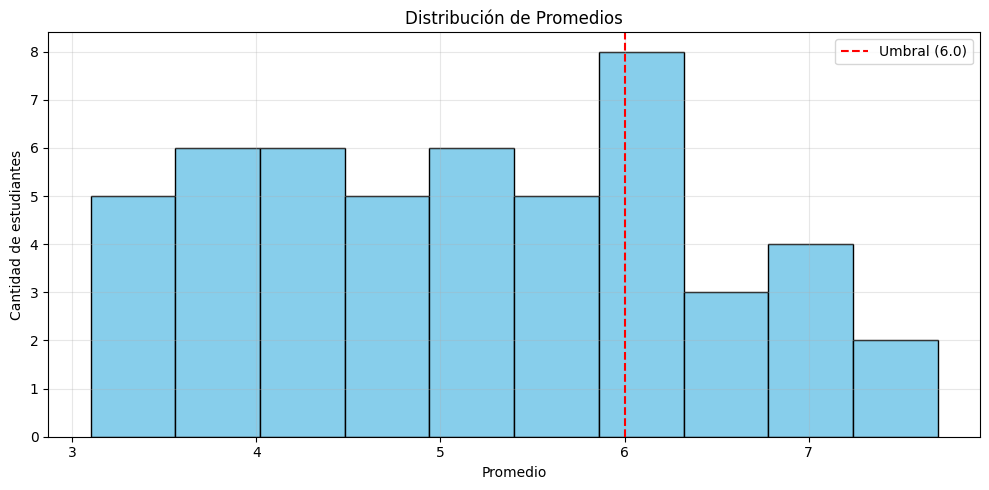

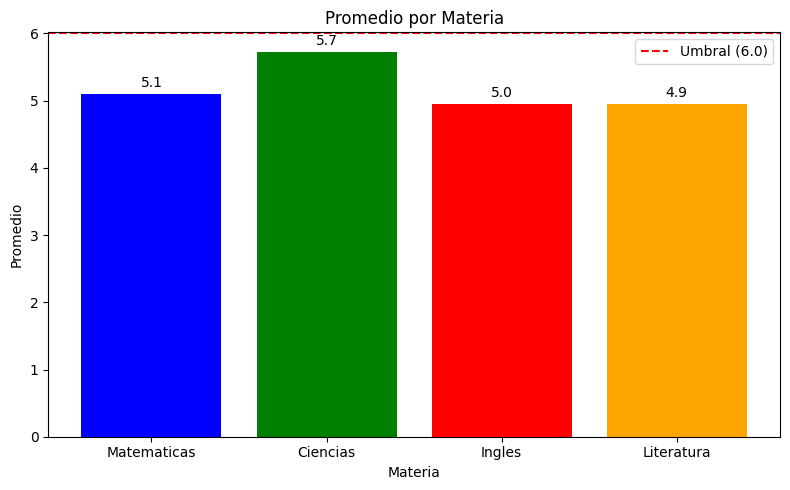

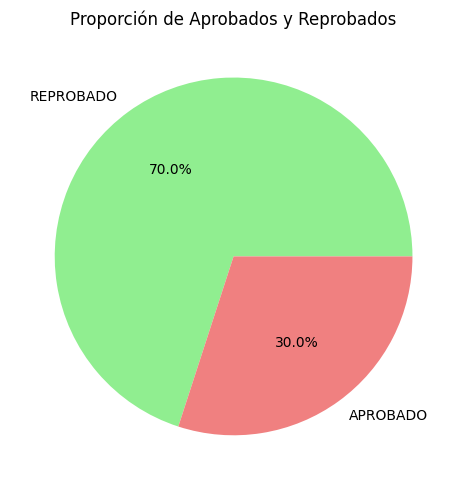

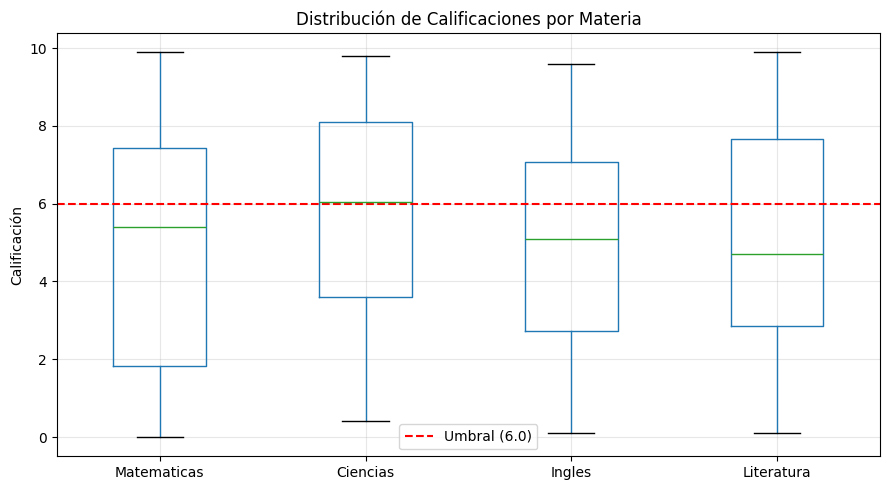


DATOS BÁSICOS:
Total estudiantes: 50
Materias: Matematicas, Ciencias, Ingles, Literatura

Primeros 5 estudiantes:
       id  promedio     estado
0  EST001       5.4  REPROBADO
1  EST002       6.5   APROBADO
2  EST003       3.1  REPROBADO
3  EST004       3.4  REPROBADO
4  EST005       4.2  REPROBADO

Promedios por materia:
  Matematicas: 5.1
  Ciencias: 5.7
  Ingles: 5.0
  Literatura: 5.0

Estudiantes aprobados: 15
Estudiantes reprobados: 35


In [14]:
print("=" * 60)
print("PARTE 3: VISUALIZACIONES SIMPLES")
print("=" * 60)

# ------------------------------------------------------------
# VISUALIZACIÓN 1: Histograma de promedios
# ------------------------------------------------------------
plt.figure(figsize=(10, 5))
plt.hist(df_reportes['promedio'], bins=10, color='skyblue', edgecolor='black')
plt.axvline(x=6.0, color='red', linestyle='--', label='Umbral (6.0)')
plt.xlabel('Promedio')
plt.ylabel('Cantidad de estudiantes')
plt.title('Distribución de Promedios')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# VISUALIZACIÓN 2: Promedios por materia
# ------------------------------------------------------------
promedios_materia = df_estudiantes[materias].mean()

plt.figure(figsize=(8, 5))
bars = plt.bar(materias, promedios_materia, color=['blue', 'green', 'red', 'orange'])
plt.axhline(y=6.0, color='red', linestyle='--', label='Umbral (6.0)')
plt.xlabel('Materia')
plt.ylabel('Promedio')
plt.title('Promedio por Materia')
plt.legend()

# Agregar valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}', ha='center')

plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# VISUALIZACIÓN 3: Aprobados vs Reprobados
# ------------------------------------------------------------
estados_count = df_reportes['estado'].value_counts()

plt.figure(figsize=(7, 5))
plt.pie(estados_count.values, labels=estados_count.index,
        autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Proporción de Aprobados y Reprobados')
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# VISUALIZACIÓN 4: Diagrama de caja por materia
# ------------------------------------------------------------
plt.figure(figsize=(9, 5))
df_estudiantes[materias].boxplot()
plt.axhline(y=6.0, color='red', linestyle='--', label='Umbral (6.0)')
plt.ylabel('Calificación')
plt.title('Distribución de Calificaciones por Materia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# Mostrar datos básicos
# ------------------------------------------------------------
print("\nDATOS BÁSICOS:")
print(f"Total estudiantes: {n_alumnos}")
print(f"Materias: {', '.join(materias)}")
print(f"\nPrimeros 5 estudiantes:")
print(df_reportes[['id', 'promedio', 'estado']].head().to_string())
print(f"\nPromedios por materia:")
for materia in materias:
    print(f"  {materia}: {df_estudiantes[materia].mean():.1f}")
print(f"\nEstudiantes aprobados: {(df_reportes['estado'] == 'APROBADO').sum()}")
print(f"Estudiantes reprobados: {(df_reportes['estado'] == 'REPROBADO').sum()}")